In [31]:
# Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from IPython.display import display
from tweepy import OAuthHandler
%matplotlib inline

In [40]:
# Authorizing the API


consumer_key = 'n1gDcWukWnKnWrjgiG3ehyMWj'
consumer_secret = '7wnHaiE7xJcuHpep1a4wlXzy3b0WpIUKr8nkKv4YqGqljMwUNf'
access_token = '75494022-QzpwSyZ9H6bzsdTEPZjD3nW6SkOOxVJhoW4bKNAkb'
access_secret = 'yBQwPrn61ZDmUoco9cksNwrq8sBiqLAMQUaAeoRcScPzz'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)


In [42]:
tweets = tweepy.Cursor(api.search, q='bitcoin',since='2018-06-27', until='2018-06-28').items(50)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [43]:
display(data)

,Tweets
0,RT @Richard_trades: Do you know you can earn u...
1,RT @murthaburke: Essentia ICO - A Masternoded ...
2,RT @murthaburke: Essentia ICO - A Masternoded ...
3,RT @celilozturk24: ANYTHING APP AIRDROP 📢⭐⭐⭐⭐⭐...
4,RT @TheCryptoDog: @Fergulati Damn right.\n\nAn...
5,"@brian_armstrong Great, this was the orig conc..."
6,RT @angela_walch: @LukeDashjr @socrates1024 Wo...
7,RT @murthaburke: KWATT Coin ICO - Tokenized El...
8,Where Will Bitcoin and Blockchain Fit in the B...
9,2018 Cryptocurrency Survey Finds Bitcoin Most ...


In [44]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [45]:
data['SAnalysis'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

In [46]:
print (data)

                                               Tweets  SAnalysis
0   RT @Richard_trades: Do you know you can earn u...          0
1   RT @murthaburke: Essentia ICO - A Masternoded ...          0
2   RT @murthaburke: Essentia ICO - A Masternoded ...          0
3   RT @celilozturk24: ANYTHING APP AIRDROP 📢⭐⭐⭐⭐⭐...          1
4   RT @TheCryptoDog: @Fergulati Damn right.\n\nAn...          1
5   @brian_armstrong Great, this was the orig conc...          1
6   RT @angela_walch: @LukeDashjr @socrates1024 Wo...         -1
7   RT @murthaburke: KWATT Coin ICO - Tokenized El...          0
8   Where Will Bitcoin and Blockchain Fit in the B...          1
9   2018 Cryptocurrency Survey Finds Bitcoin Most ...          1
10  @doc_bitcoin @knuck13head ZRX will hit 5B mark...          1
11  RT @HippocratesNews: #Bitcoin #carnivores?\nht...          0
12  RT @uncloakio: “The Coinrail attack highlights...          0
13  Bitcoin Origin aims to create the world's firs...          1
14  RT @EthereumZ: 🚀Be on

In [47]:
import seaborn as sns


0.36


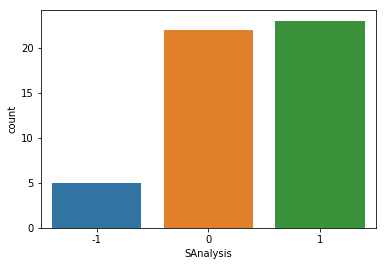

In [48]:
# Mostly positive sentiment for the 24 hour period

bitcoin = sns.countplot(data['SAnalysis'],data=data)
avg_bitcoin = data['SAnalysis'].mean()
print (data['SAnalysis'].mean())

In [49]:
# Now I compare the same sentiment analysis across other cryptocurrencies.


eth_tweets = tweepy.Cursor(api.search, q='ethereum',since='2018-06-27', until='2018-06-28').items(50)
eth_data = pd.DataFrame(data=[tweet.text for tweet in eth_tweets], columns=['Tweets'])
eth_data['SAnalysis'] = np.array([ analize_sentiment(tweet) for tweet in eth_data['Tweets']])

lite_tweets = tweepy.Cursor(api.search, q='litecoin',since='2018-06-27', until='2018-06-28').items(50)
lite_data = pd.DataFrame(data=[tweet.text for tweet in lite_tweets], columns=['Tweets'])
lite_data['SAnalysis'] = np.array([ analize_sentiment(tweet) for tweet in lite_data['Tweets'] ])

ripple_tweets = tweepy.Cursor(api.search, q='ripple',since='2018-06-27', until='2018-06-28').items(50)
ripple_data = pd.DataFrame(data=[tweet.text for tweet in ripple_tweets], columns=['Tweets'])
ripple_data['SAnalysis'] = np.array([ analize_sentiment(tweet) for tweet in ripple_data['Tweets'] ])

Average sentiment of ethereum is  0.48
AxesSubplot(0.125,0.125;0.775x0.755)


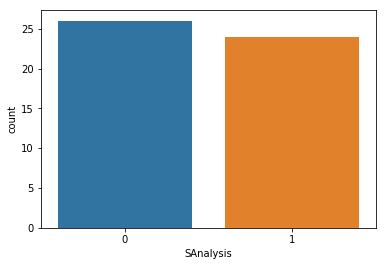

In [50]:
ethereum = sns.countplot(eth_data['SAnalysis'],data=data)
avg_eth = eth_data['SAnalysis'].mean()
print ('Average sentiment of ethereum is ',eth_data['SAnalysis'].mean())

print (ethereum)

Average sentiment of litecoin is  0.52
AxesSubplot(0.125,0.125;0.775x0.755)


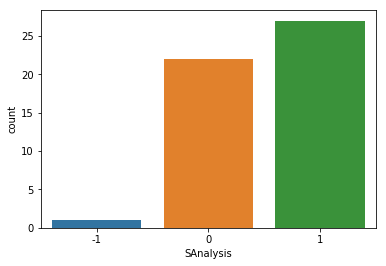

In [51]:
litecoin = sns.countplot(lite_data['SAnalysis'],data=data)
avg_lite = lite_data['SAnalysis'].mean()
print ('Average sentiment of litecoin is ',lite_data['SAnalysis'].mean())

print (litecoin)

Average sentiment of ripple is  0.48
AxesSubplot(0.125,0.125;0.775x0.755)


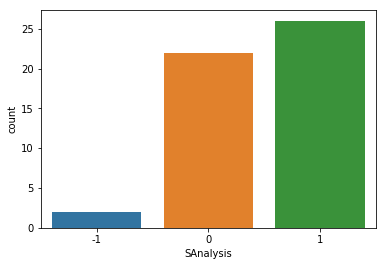

In [52]:
ripple = sns.countplot(ripple_data['SAnalysis'],data=data)
avg_ripple = ripple_data['SAnalysis'].mean()
print ('Average sentiment of ripple is ',ripple_data['SAnalysis'].mean())

print (ripple)

<BarContainer object of 4 artists>

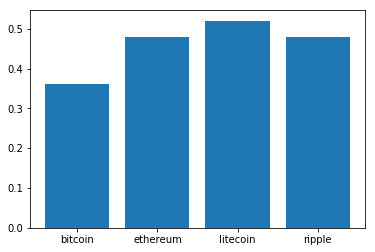

In [53]:
# Average sentiment rating across cryptocurrencies for the 27th of June. Quite similar, I must say.

x = ['bitcoin','ethereum','litecoin','ripple']
y = [avg_bitcoin,avg_eth,avg_lite,avg_ripple]
plt.bar(x,y)